In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
#Loading the Dataset
import pandas as pd

# Load dataset
data_path = '/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv' 
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(df.head())


   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [8]:
# Initial the dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB
None
                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000  

In [9]:
#Handling Missing Data
import pandas as pd
import numpy as np

# Creating DataFrame from provided data
data = {
    'Id': [1, 2, 3, 4, 5],
    'Pregnancies': [6, 1, 8, 1, 0],
    'Glucose': [148, 85, 183, 89, 137],
    'BloodPressure': [72, 66, 64, 66, 40],
    'SkinThickness': [35, 29, 0, 23, 35],
    'Insulin': [0, 0, 0, 94, 168],
    'BMI': [33.6, 26.6, 23.3, 28.1, 43.1],
    'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288],
    'Age': [50, 31, 32, 21, 33],
    'Outcome': [1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Handling missing values by replacing zero values with NaN
columns_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_missing] = df[columns_with_missing].replace(0, np.nan)

# Filling missing values with the median of each column
df[columns_with_missing] = df[columns_with_missing].fillna(df[columns_with_missing].median())

# Verify that there are no more missing values
print(df.isnull().sum())


Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
# Remove duplicated data
df.drop_duplicates(keep='first', inplace=True)

# Check the shape of the dataframe to see how many rows are left
print(df.shape)


(5, 10)


In [2]:
#Creating a Test Set
from sklearn.model_selection import train_test_split

# Split into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print(train_df.shape, test_df.shape)


(4, 10) (1, 10)


In [11]:
#Rescaling and Standardizing the Data
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

# Display the first few rows of the standardized training data
print(train_df.head())


   Id  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
4   5    -1.121153 -0.066928      -1.680836       0.762493  1.414214   
2   3     1.270640  1.301376       0.286972       0.152499  0.000000   
0   1     0.672692  0.260275       0.942908       0.762493  0.000000   
3   4    -0.822179 -1.494723       0.450956      -1.677484 -1.414214   

        BMI  DiabetesPedigreeFunction       Age  Outcome  
4  1.504793                  1.678887 -0.096449        1  
2 -1.185492                 -0.331548 -0.192897        1  
0  0.214000                 -0.387531  1.543177        1  
3 -0.533301                 -0.959809 -1.253831        0  


In [4]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
encoder = LabelEncoder()
train_df['Outcome'] = encoder.fit_transform(train_df['Outcome'])
test_df['Outcome'] = encoder.transform(test_df['Outcome'])

# Display the first few rows of the encoded training data
print(train_df.head())


   Id  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
4   5    -1.121153 -0.066928      -1.680836       0.762493  1.414214   
2   3     1.270640  1.301376       0.286972       0.152499  0.000000   
0   1     0.672692  0.260275       0.942908       0.762493  0.000000   
3   4    -0.822179 -1.494723       0.450956      -1.677484 -1.414214   

        BMI  DiabetesPedigreeFunction       Age  Outcome  
4  1.504793                  1.678887 -0.096449        1  
2 -1.185492                 -0.331548 -0.192897        1  
0  0.214000                 -0.387531  1.543177        1  
3 -0.533301                 -0.959809 -1.253831        0  


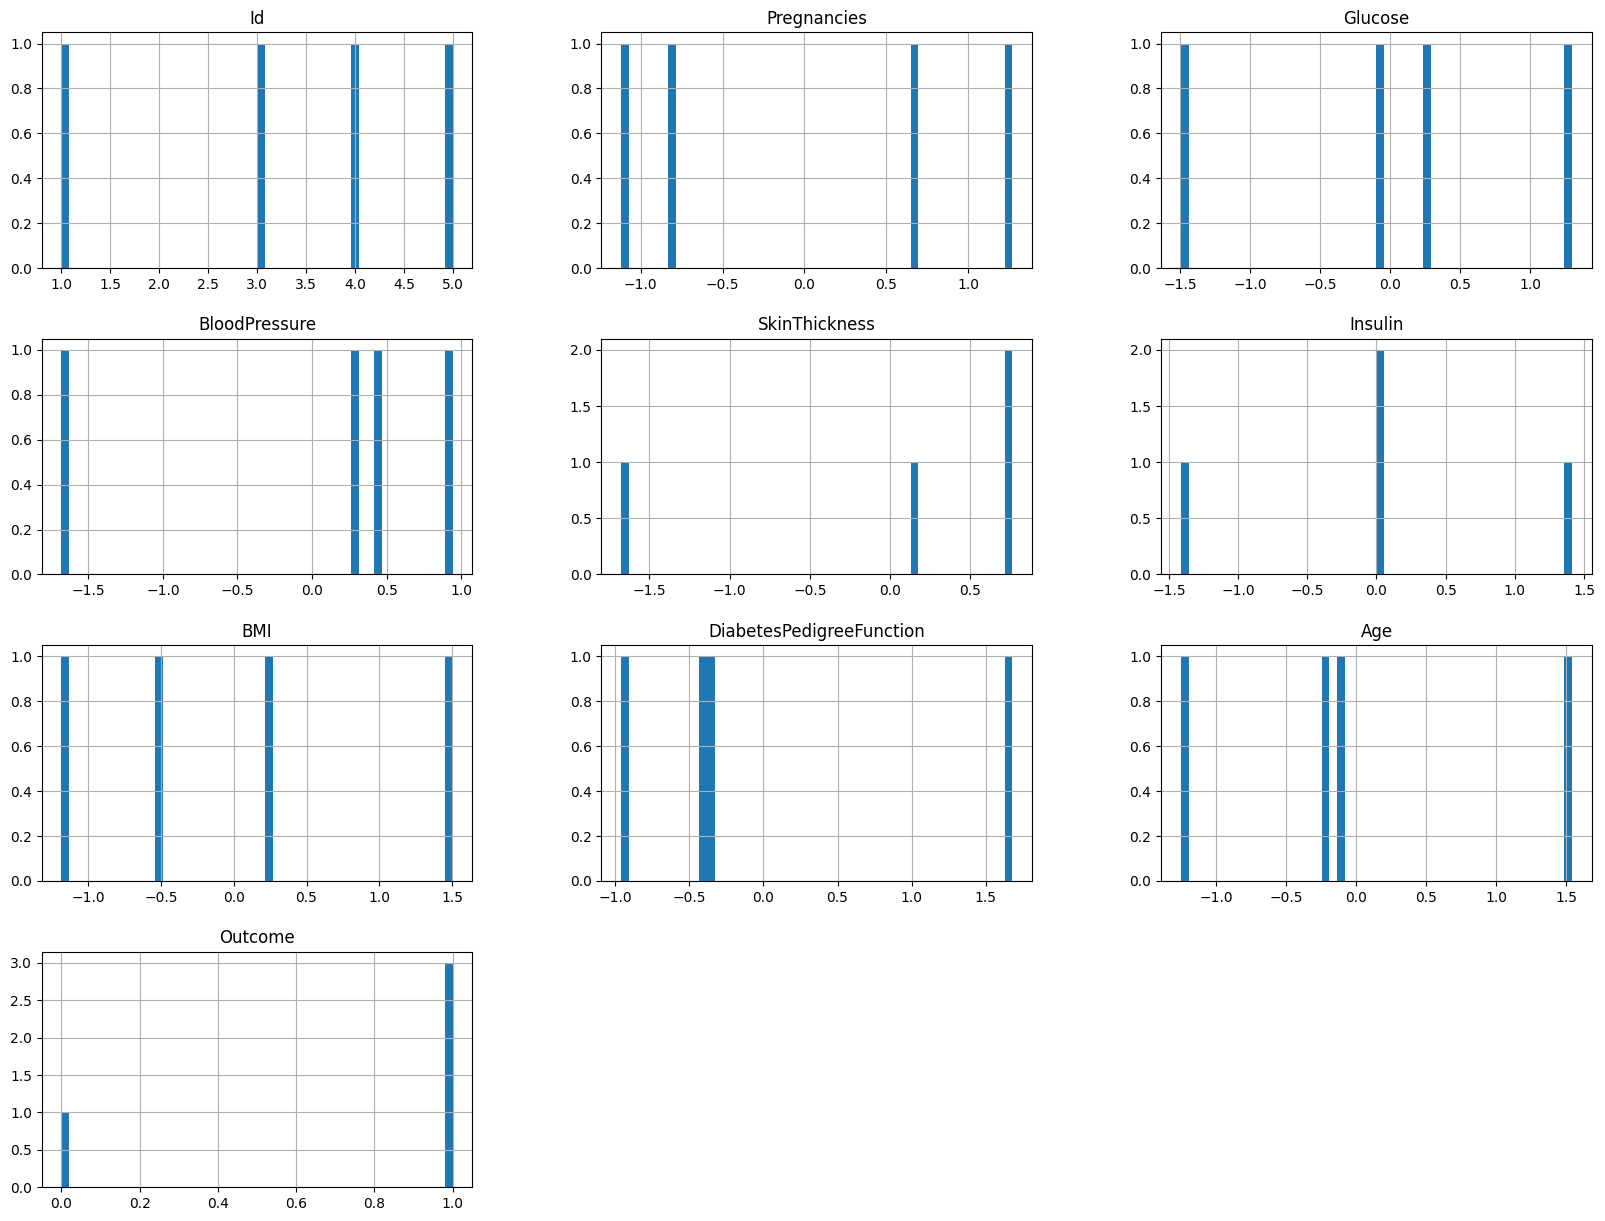

In [5]:
#Handling Outliers and Noisy Data
import matplotlib.pyplot as plt

# Visualize data distributions
train_df.hist(bins=50, figsize=(20, 15))
plt.show()


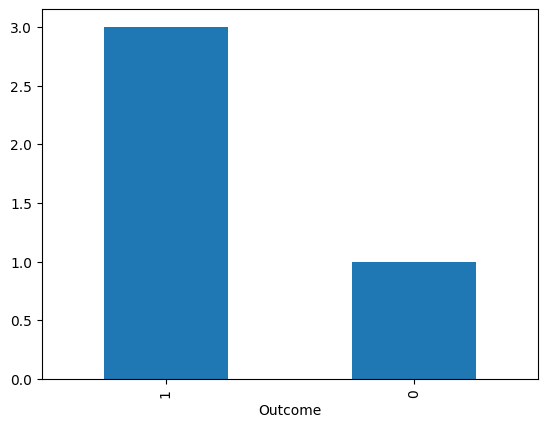

In [6]:
# Final Check and Balancing the Data
train_df['Outcome'].value_counts().plot(kind='bar')
plt.show()
